# **Let's Grow More Data Science Virtual Internship Program june 2023**

# **LGMVIP june 2023**

## **BY: Syed Ameen Ikhlaas H**

### **BEGINNER LEVEL TASK**

## **Task 2: Stock Market Prediction And Forecasting Using Stacked LSTM**

### **Datasetlinks: : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv**

### **Importing the Required Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from sklearn.metrics import mean_squared_error

### **Loading the Dataset**


In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
df = pd.read_csv(url)

### **Exploratory Data Analysis**

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.shape

(2035, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [7]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

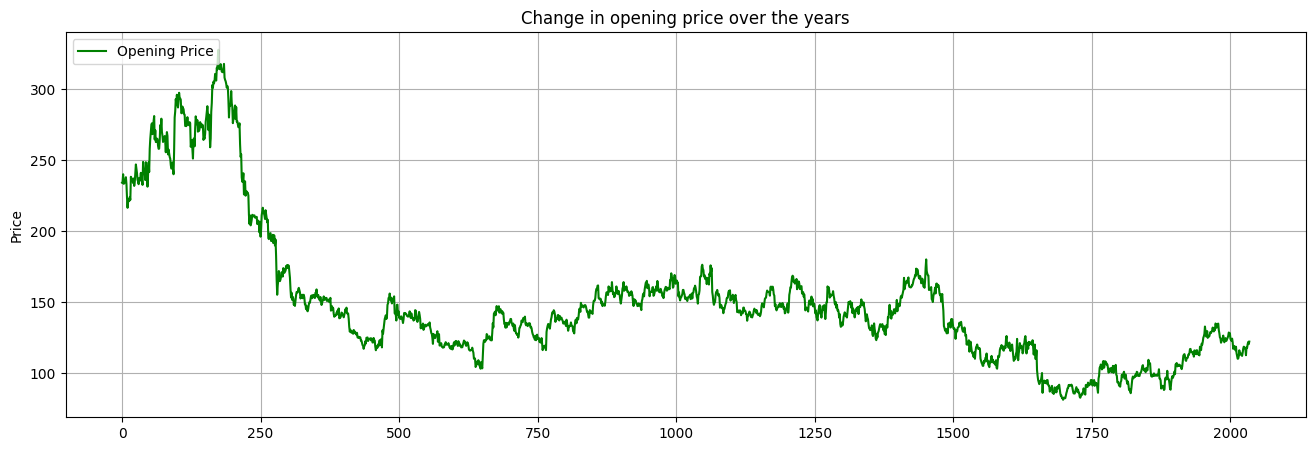

In [8]:
df['Open'].plot(kind='line',figsize=(16,5),color='g',label="Opening Price")

plt.ylabel("Price")
plt.legend(loc="upper left")
plt.title("Change in opening price over the years")
plt.grid()

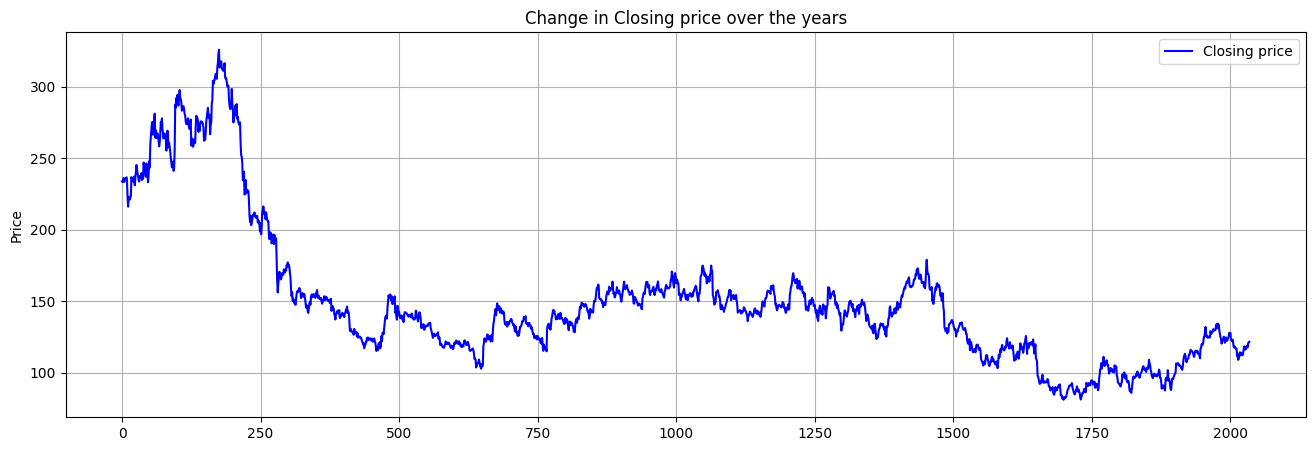

In [9]:

df['Close'].plot(kind='line',figsize=(16,5),color='b',label="Closing price")

plt.ylabel("Price")
plt.legend(loc="upper right")
plt.title("Change in Closing price over the years")
plt.grid()

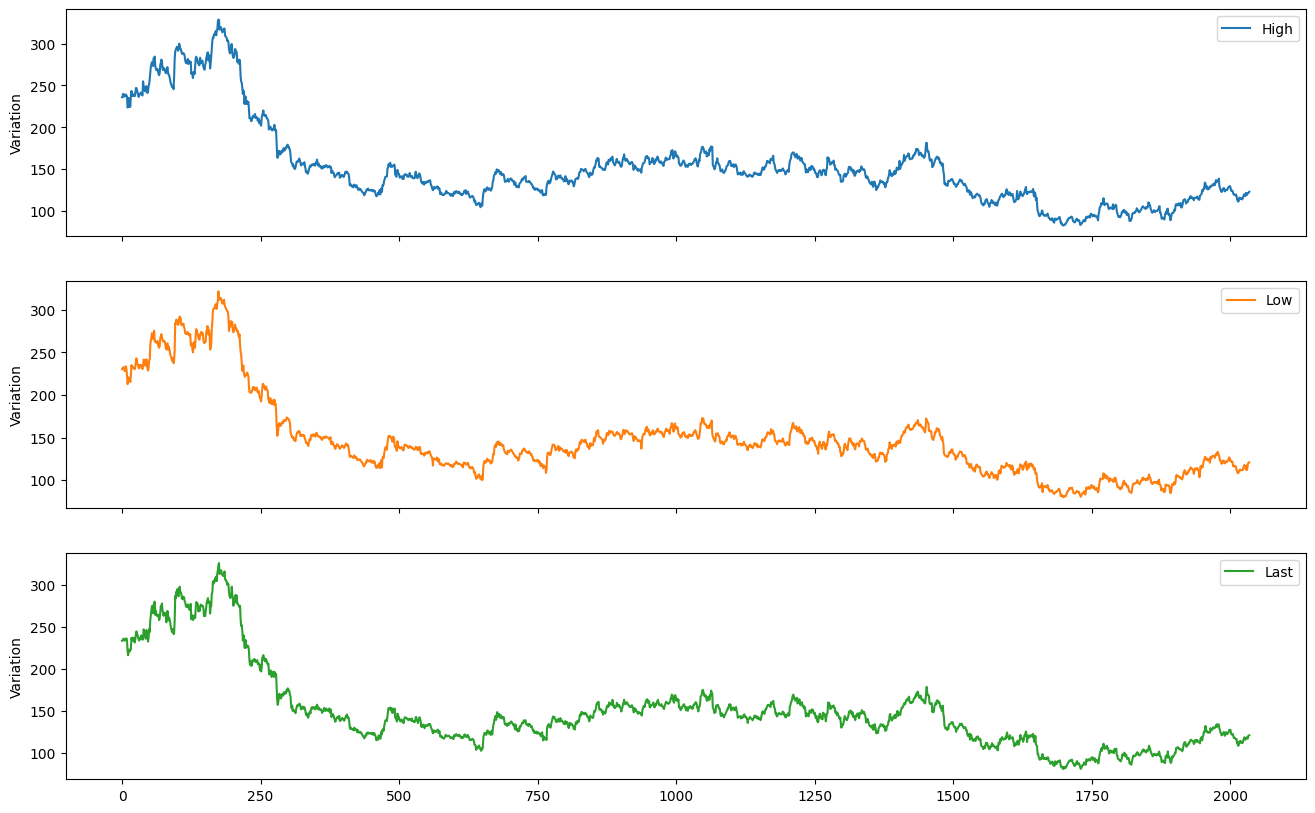

In [10]:
cols_plot = ['High','Low','Last']
axes = df[cols_plot].plot(alpha = 1, figsize=(16,10), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')

In [11]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-09-28,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2010-07-27,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


In [12]:
del df["Date"]

### **7 day rolling mean**

In [13]:
df.rolling(7).mean().head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-19,235.200000,237.557143,231.135714,234.414286,234.307143,3.274848e+06,7652.388571
2018-09-18,235.750000,238.028571,231.607143,234.700000,234.492857,3.209831e+06,7509.724286
2018-09-17,235.550000,238.200000,231.485714,235.071429,234.971429,2.936693e+06,6879.075714


<Axes: xlabel='Date'>

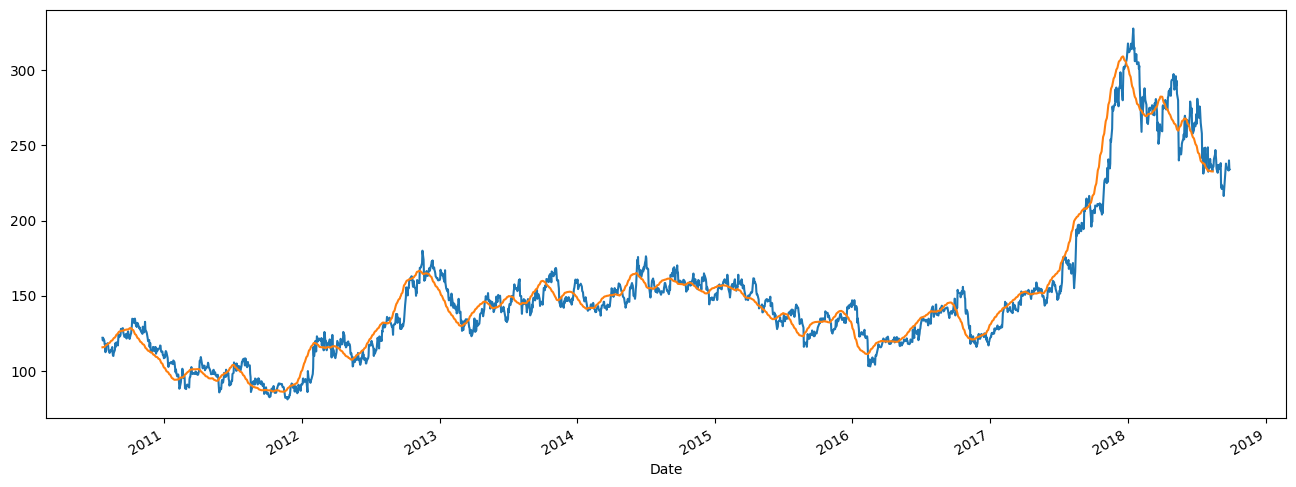

In [14]:
df['Open'].plot(figsize=(16,6),alpha = 1)
df.rolling(window=30).mean()['Close'].plot(alpha = 1)

<Axes: xlabel='Date'>

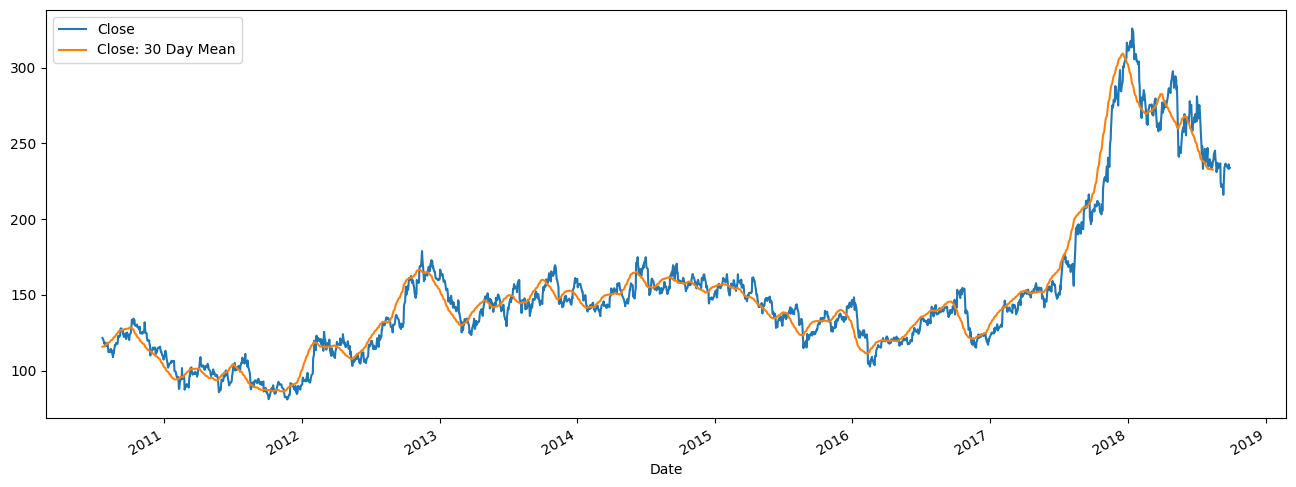

In [15]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(16,6),alpha = 1)

In [16]:
df1=df.reset_index()['Open']
df1

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

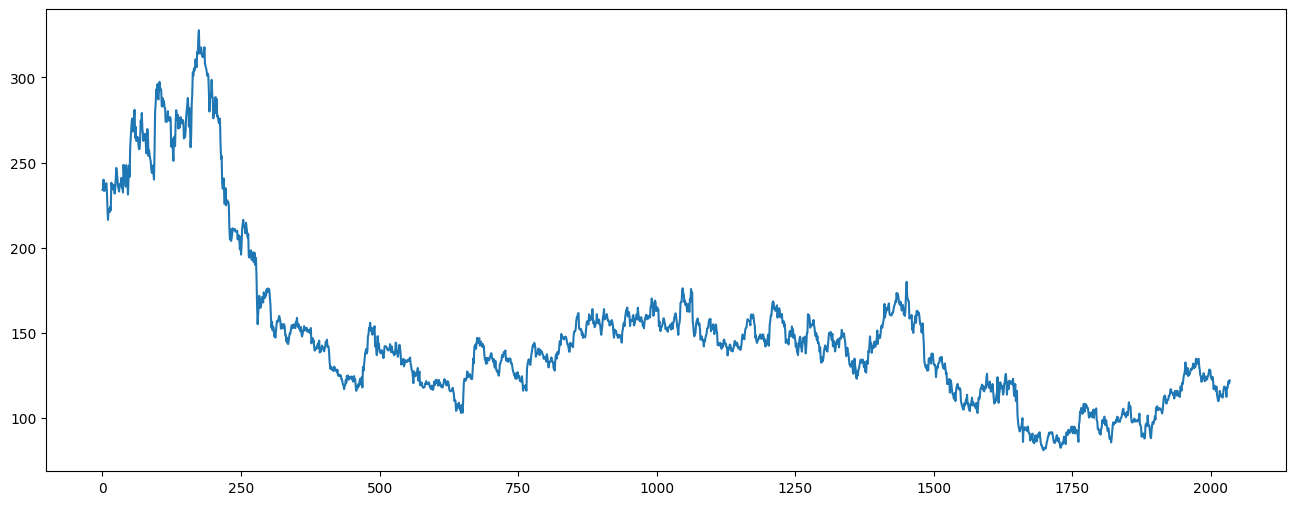

In [17]:
plt.figure(figsize=(16,6))
plt.plot(df1)

### **Preprocessing**

In [18]:
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df2)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


### **splitting dataset into train and test split**

In [19]:
train_size=int(len(df2)*0.70)
test_size=len(df2)-train_size
train_data,test_data=df2[0:train_size,:],df2[train_size:len(df2),:1]

In [20]:
train_size,test_size

(1424, 611)

In [21]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        train_X.append(a)
        train_Y.append(dataset[i + time_step, 0])
    return numpy.array(train_X), numpy.array(train_Y)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
import numpy
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
# Create the Stacked LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 15s 318ms/step - loss: 0.0278 - val_loss: 0.0044
Epoch 2/100
21/21 [==============================] - 4s 170ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 3/100
21/21 [==============================] - 2s 119ms/step - loss: 0.0017 - val_loss: 9.1482e-04
Epoch 4/100
21/21 [==============================] - 2s 118ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 5/100
21/21 [==============================] - 2s 119ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 6/100
21/21 [==============================] - 3s 151ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7/100
21/21 [==============================] - 2s 118ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 8/100
21/21 [==============================] - 2s 119ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/100
21/21 [==============================] - 2s 117ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/100
21/21 [==============================] - 3s 130ms/step - loss: 0.0011 - v

In [28]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 0s 24ms/step


In [29]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
# Calculate RMSE performance metrics
import math
math.sqrt(mean_squared_error(y_train,train_predict))

162.61700151104057

In [31]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

108.03130729463919

In [32]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

In [33]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

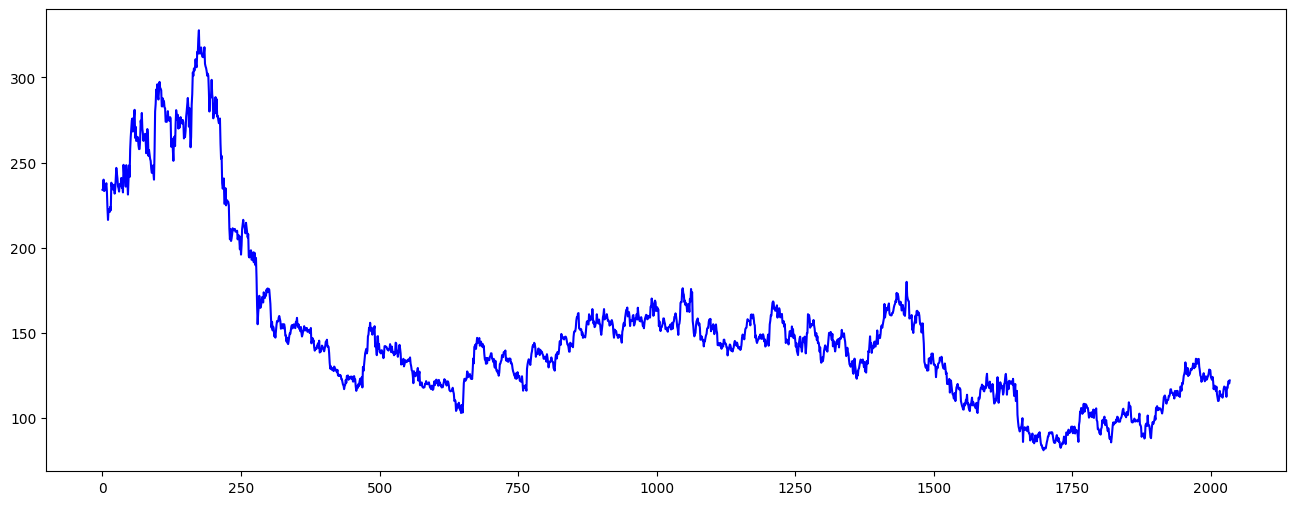

In [40]:
# plot baseline and predictions
pred  = scaler.inverse_transform(df2)
plt.figure(figsize=(16,6))
plt.plot(pred,color='blue')
plt.show()

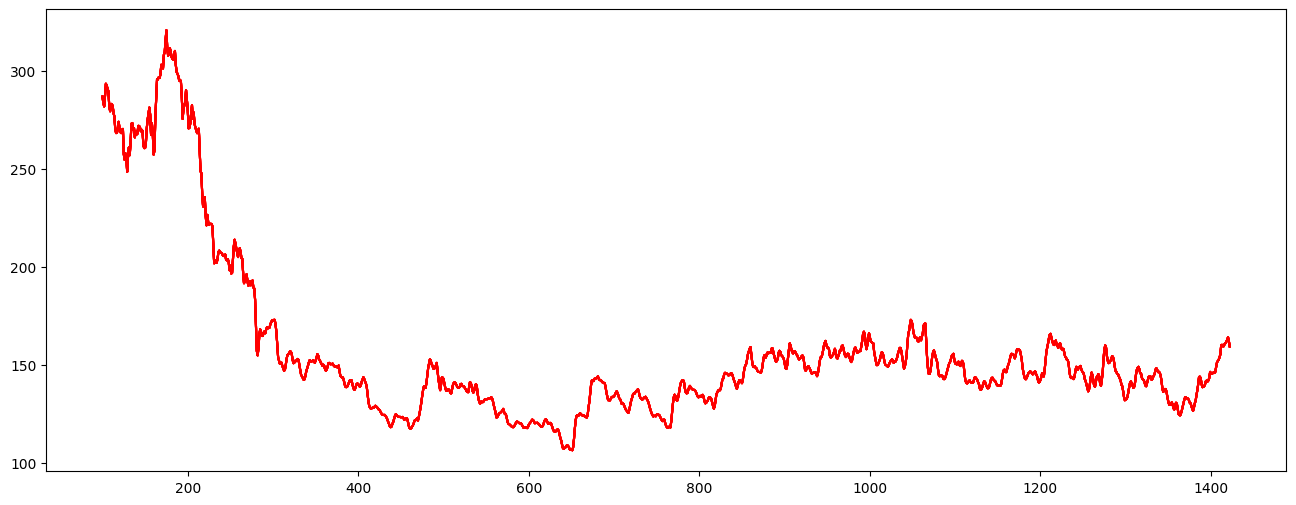

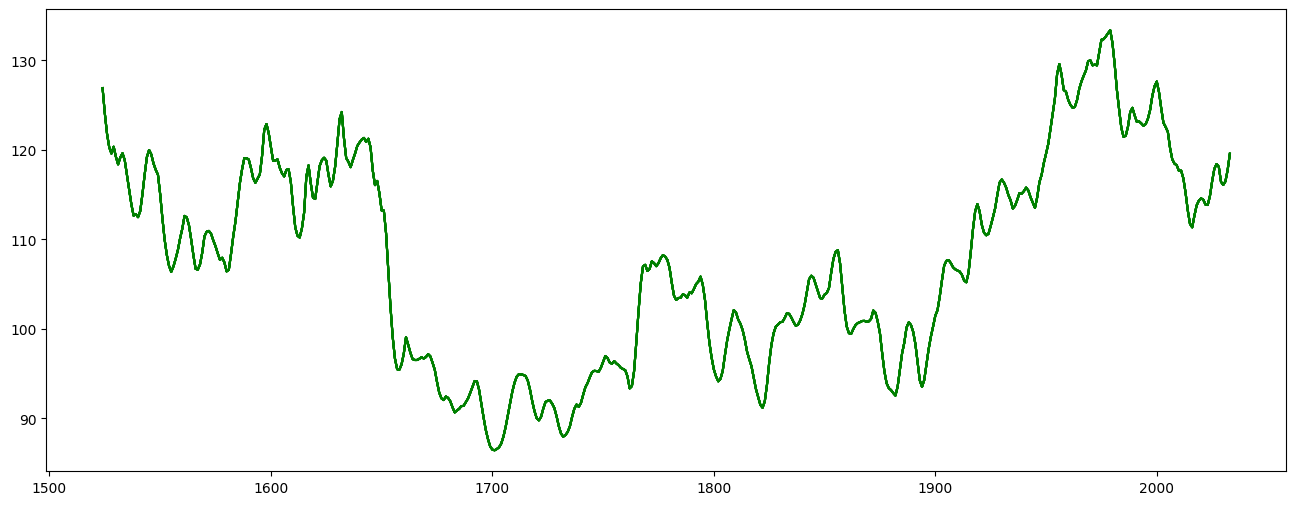

In [42]:
plt.figure(figsize=(16,6))
plt.plot(trainPredictPlot,color='red')
plt.show()
plt.figure(figsize=(16,6))
plt.plot(testPredictPlot,color='green')
plt.show()

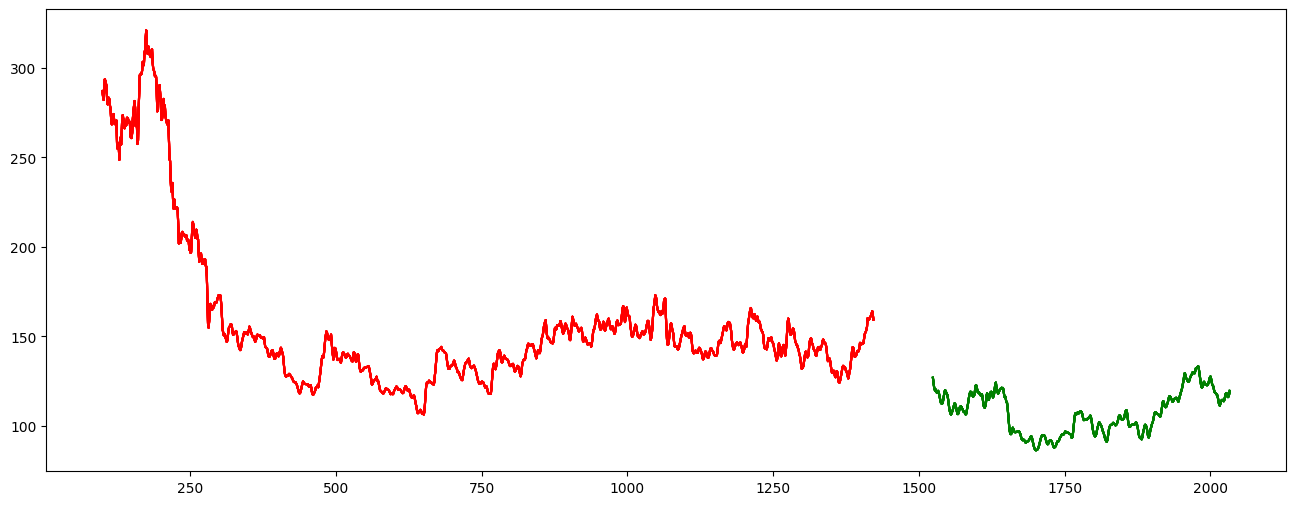

In [47]:
plt.figure(figsize=(16,6))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

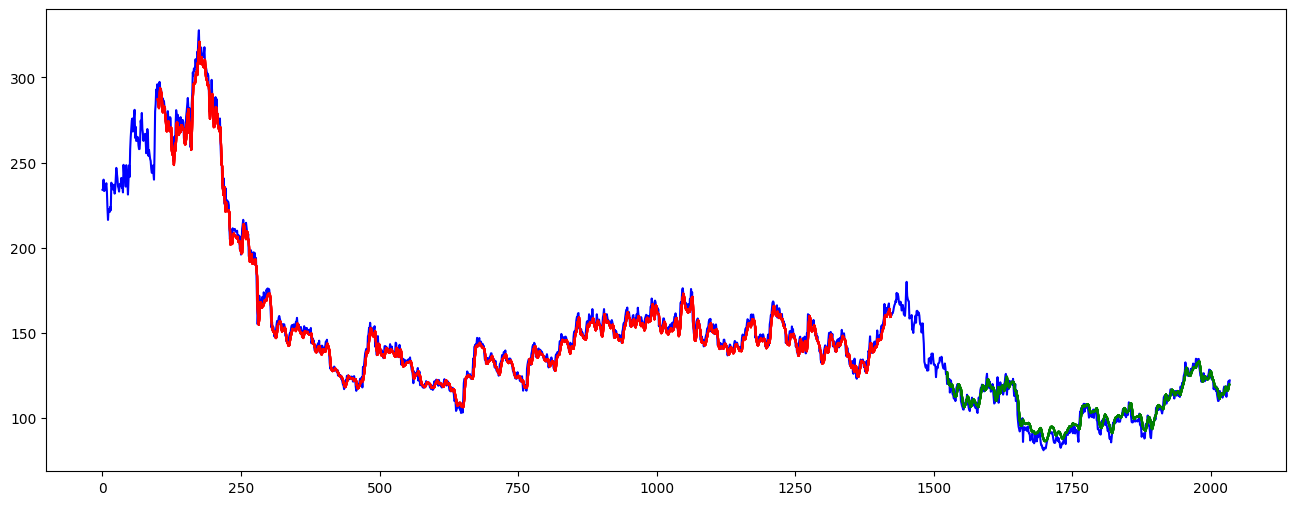

In [48]:
plt.figure(figsize=(16,6))
plt.plot(pred,color='blue')
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [38]:
len(test_data)

611

In [39]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 270)